# Experiment - 2 : Multiple Linear Regression

Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of Multiple Linear Regression

Aim: To apply Multiple Linear Regression on a given dataset.

---

#### Visualizing Actual vs. Predicted Values

#### Residual Plot

Problem statement:
-
- Use the given dataset to perform Multiple Linear Regression.
- Study the effect of multiple independent variables on a dependent variable.

Objective:
-
- To understand the basics of Multiple Linear Regression.
- To build and analyze a Multiple Linear Regression model.
---



Mimicing real world predictions. Most decisions are influenced by several factors.

Here we use several independent variables to predict a single dependent variables.

The equation looks similar to the following:

$$u = {m_1}x_1 + {m_2}x_2 + {m_3}x_3 + c $$

Here there can be several

## Lab Content

#### Importing Dataset and Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Semesters/SEM_4/SML/Lab/Datasets/mlr_ds.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Import data to variables

In [5]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

#### Multiple Linear Regression

Splitting the data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

Fitting the model

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Predicted Line equation

It is observed that the equation created is:
$$y = 0.0461x_1 + 0.1791x_2 + 0.0009x_3 + 3.0172$$

In [8]:
print("Intercept: ", model.intercept_)
print("Coefficients: ")
list(zip(x, model.coef_))

Intercept:  3.0172464007345283
Coefficients: 


[('TV', np.float64(0.04617120236600302)),
 ('Radio', np.float64(0.17915641171997038)),
 ('Newspaper', np.float64(0.0009195099150418329))]

Looking at the predictions

In [9]:
y_pred = model.predict(x_test)
print(y_pred)

[15.19246146 17.72770402 16.22667023 21.54571987 11.48162262 15.50466332
  9.18123621  7.80140719 14.10188597 21.6709594  11.38278979 16.86804213
  7.42093988 15.28232735 16.60996642  3.79146672  8.88714783 20.63350226
 18.91520577 20.88681953 14.85757193  7.53887751 12.42628677 24.01843885
 18.07354844 19.12470803 18.37226022 13.67548266 23.29854708 14.87597991
 18.03918433 11.57002932 19.42083136 10.04177219 23.1919887  12.76083113
 14.91359603 11.69672111 12.15418178 20.60960324]


Saving predictions in dataframe for later

In [10]:
predics = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predics.head()

,Actual,Predicted
156,15.3,15.192461
70,18.3,17.727704
178,11.8,16.226670
47,23.2,21.545720
86,12.0,11.481623


##### Visualizations


Below is a comparison of actual sales vs predicted sales.

Here, the closer the blue dots to the red line, the more the accurate the model is.

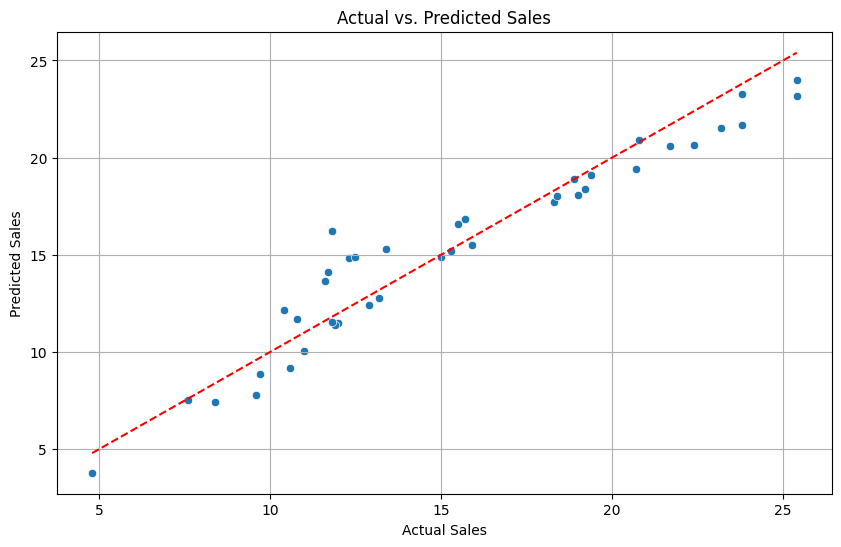

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=predics)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([min(predics['Actual']), max(predics['Actual'])], [min(predics['Actual']), max(predics['Actual'])], color='red', linestyle='--')
plt.grid(True)
plt.show()

Residuals vs Predicted values:

This is the comparison of the cost of the predicted values along with its respective predicted value.

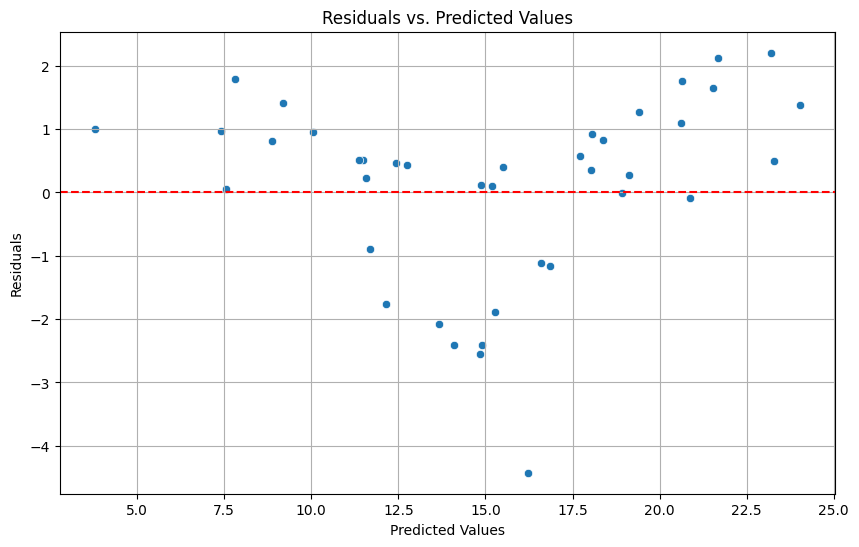

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#### Analyzing the Results

In [13]:
from sklearn import metrics as m

**R<sup>2</sup>** score

Measures the **proportion** of the `variance` in a dependent variable that's predictable from the independent variable(s) in a regression model

In [14]:
r_square = model.score(x_test, y_test)
print(r_square)

0.923927034148313


**MAE** Mean Absolute Error

Measure of the `average magnitude of errors` between **predicted** and **actual** values in a dataset.

In [15]:
mae = m.mean_absolute_error(y_test, y_pred)
print(mae)

1.1400990812295269


**MSE** Mean Squared Error

Measure of the `average squared difference` between a model's **predicted** values and the **actual** observed values.

In [16]:
mse = m.mean_squared_error(y_test, y_pred)
print(mse)

2.1097676966236154


**RMSE** Root Mean Squared Error

RMSE is preferred over MSE since it brings the value of error back into the original metric of calculations, giving you a more intuitive look at the error values.

In [17]:
rmse = np.sqrt(mse)
print(rmse)

1.4525039403125952


#### Accuracy Score
Using the MAE to calculate a score to evaluate accuracy.

$$Accuracy = 1 - (\frac{MAE}{Mean ~of ~Actual ~Values})$$

In [18]:
mae_acc = 1- mae / y_test.mean()
print(mae_acc*100)

92.59435478252986


#### Overall Scores

In [19]:
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R^2 Score {:.2f}".format(r_square*100))
print("Accuracy Score {:.2f}".format(mae_acc*100))

Mean Absolute Error 1.1400990812295269
Mean Squared Error 2.1097676966236154
Root Mean Squared Error 1.4525039403125952
R^2 Score 92.39
Accuracy Score 92.59
